# Mini-Project 2

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from src import Backtester, SimpleBuyAndHoldAgent
from src.utils import parse_config, get_logger, load_market_data
from scipy import stats

config = parse_config()
logger = get_logger("backtest", config)
market_data = load_market_data(config)

## Normality test for the log return of the recent 5 year data

In [57]:
def normality_check_data(log_return):
    p_val = stats.normaltest(log_return)[1]
    print(f"p value is {p_val:.4f}: ", end='')
    if p_val > 0.05:
        print("No evidence against normality check.")
    else:
        print("Statistical significant evidence against normality.")

    plt.figure(figsize=(12,6))
    stats.probplot(log_return, dist='norm', plot=plt)
    plt.show()

    plt.figure(figsize=(12,6))
    plt.title("Histogram of log returns with KDE")
    sns.histplot(log_return, kde=True)
    plt.show()

    # print(log_return.describe())

def normality_check_symbol(symbol):
    print("D'Agostino and Pearson's Normality Test for symbol:", symbol)
    market_data_symbol = market_data.xs(symbol, level="symbol")
    log_return = np.log(market_data_symbol['close']/market_data_symbol['close'].shift(1))
    log_return.dropna(inplace=True)
    normality_check_data(log_return)


D'Agostino and Pearson's Normality Test for symbol: SPY
p value is 0.0000: Statistical significant evidence against normality.


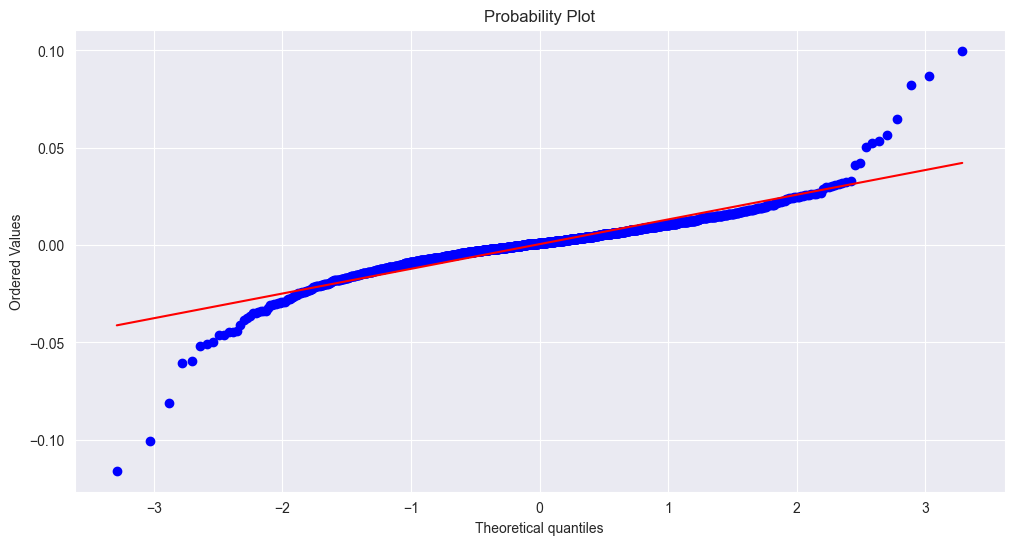

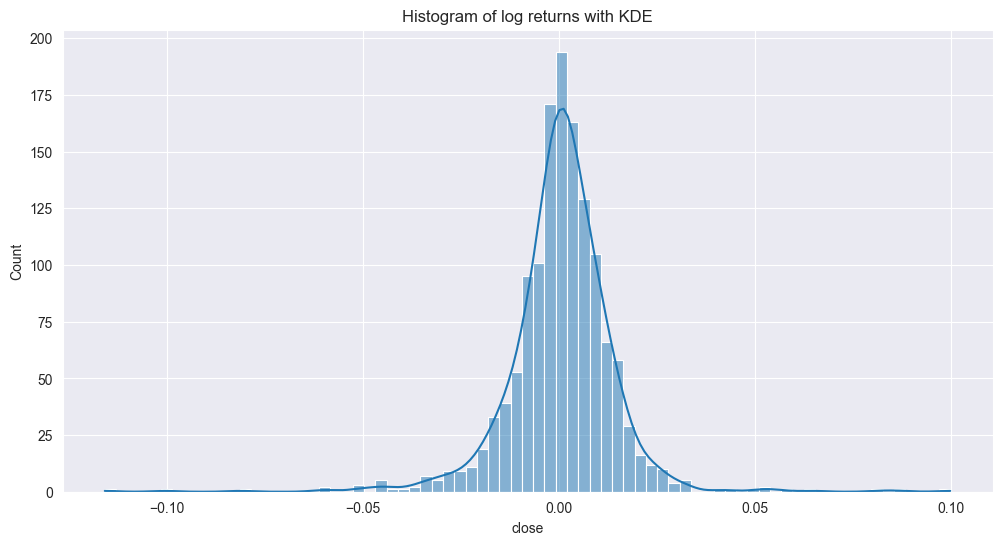

In [58]:
symbol='SPY'
normality_check_symbol(symbol)

Although the histogram of the daily log return looks like a normal distribution. However, it does not pass the normality test. We can also observe this from the Q-Q plot that the tail deviates from the reference line.

Also, the Q-Q plot also indicates that the log return follows a **heavy tail** distribution, in the sense that the rare events (very high/low log return) happens more frequently than what a normal distribution would predict.

## Removing extreme values and test normality again

D'Agostino and Pearson's Normality Test for symbol after removing extreme values: SPY
p value is 0.0000: Statistical significant evidence against normality.


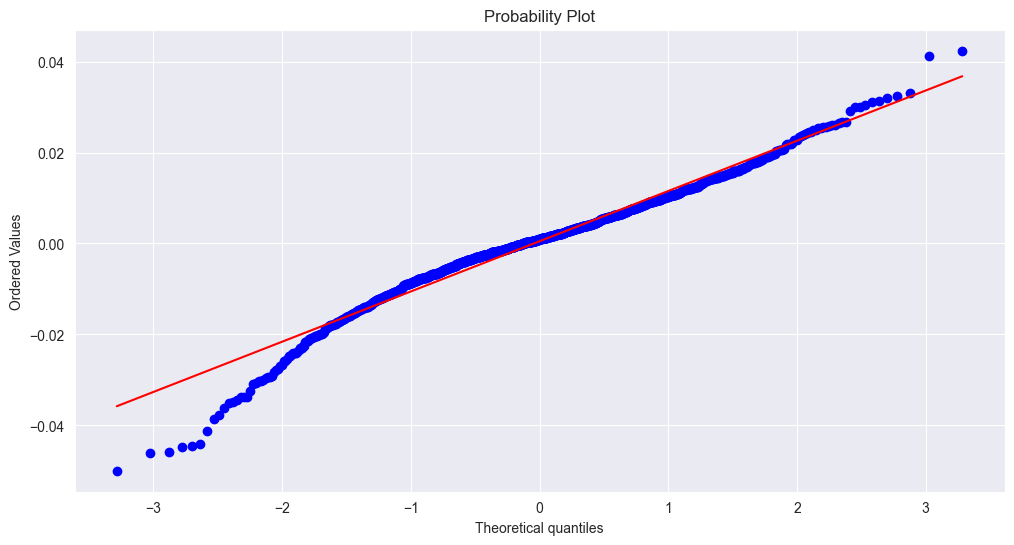

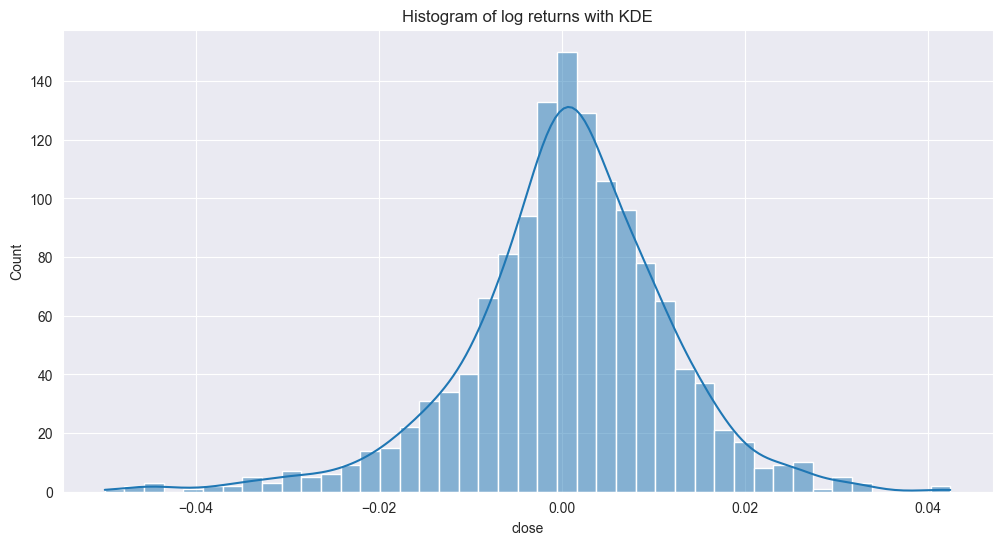

In [59]:
market_data_symbol = market_data.xs(symbol, level="symbol")
log_return = np.log(market_data_symbol['close']/market_data_symbol['close'].shift(1))
log_return.dropna(inplace=True)
log_return_no_extreme = log_return[np.abs(log_return)<0.05]

print("D'Agostino and Pearson's Normality Test for symbol after removing extreme values:", symbol)
normality_check_data(log_return_no_extreme)

## Testing the normality on the personalized portfolio
1) On the high Sharpe portfolio created previously.

p value is 0.0000: Statistical significant evidence against normality.


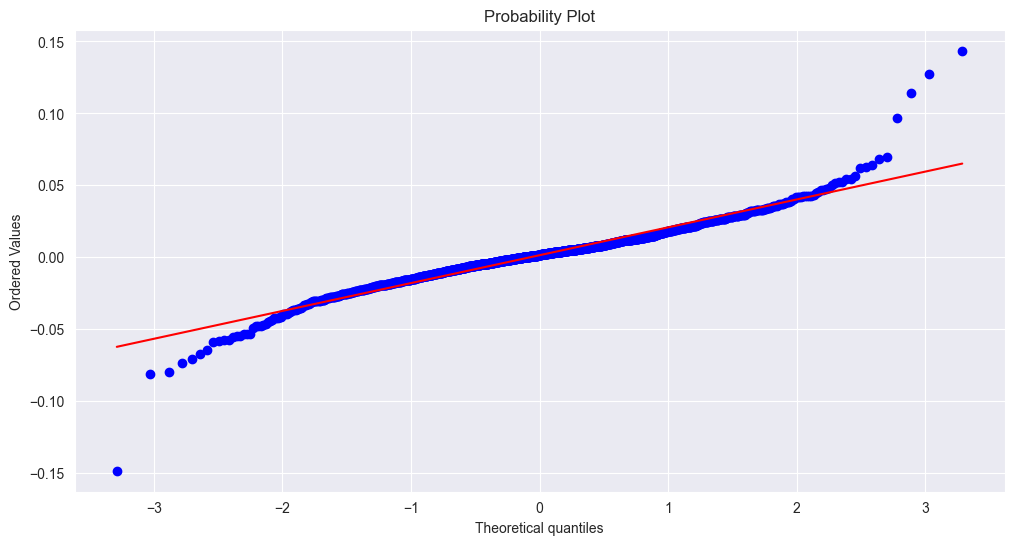

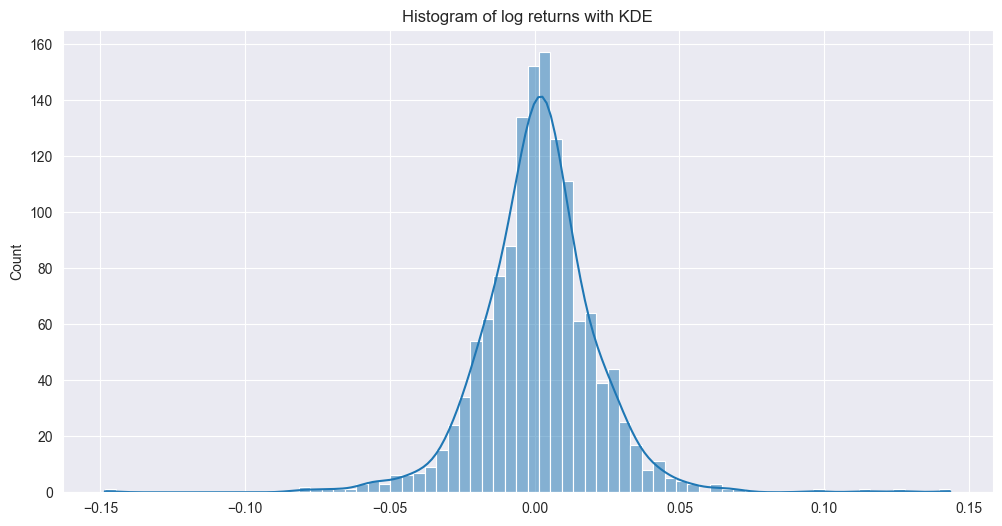

In [60]:
portfolio_weights = {'GLD': 0.4798, 'NVDA': 0.2216, 'WMT': 0.1853, 'TSLA': 0.0707, 'XOM': 0.0425}
agent = SimpleBuyAndHoldAgent(portfolio_weights)
backtester = Backtester(market_data, config, logger)

backtester.run(agent)
values = np.array(backtester.portfolio_history)
log_return = np.log(values[1:]/values[:-1])

normality_check_data(log_return)

2) On the low volatility portfolio

Backtester state has been reset.
p value is 0.0000: Statistical significant evidence against normality.


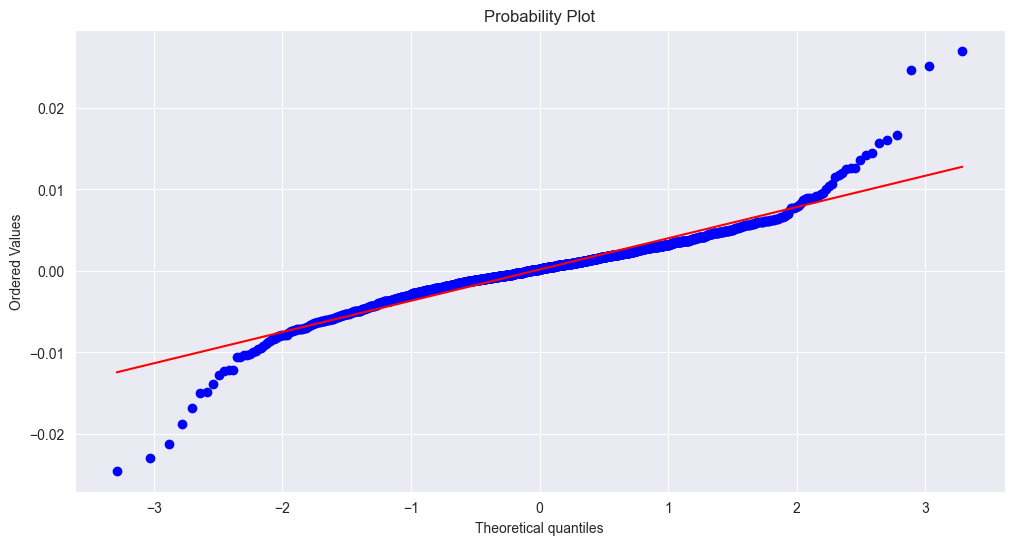

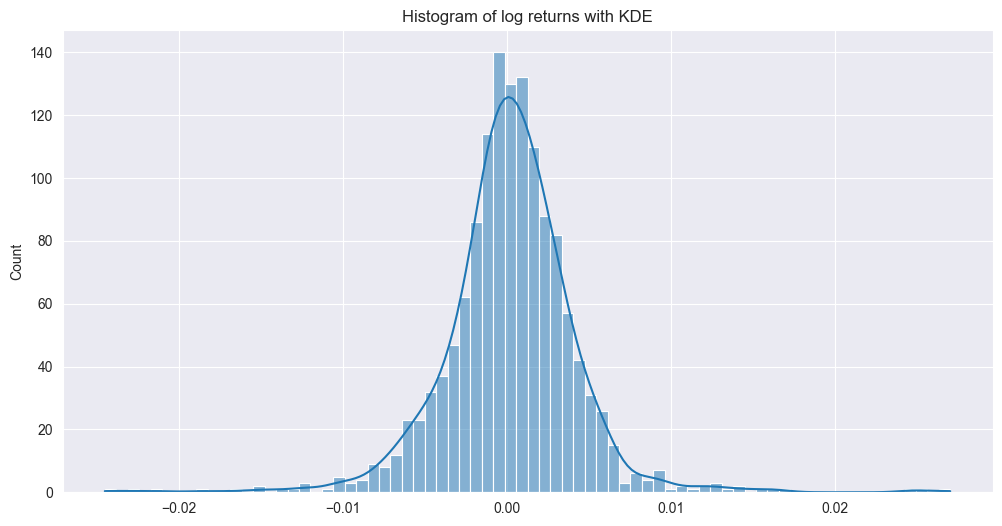

In [66]:
portfolio_weights = {'TLT': 0.3486, 'GLD': 0.2606, 'JNJ': 0.1393, 'WMT': 0.0717, 'JPM': 0.0555, 'LMT': 0.0463, 'XOM': 0.0284, 'PG': 0.0250, 'UPS': 0.0237, 'UNH': 0.0008, 'MSFT': 0.0001, }
agent = SimpleBuyAndHoldAgent(portfolio_weights)
backtester.reset()
backtester.run(agent)

values = np.array(backtester.portfolio_history)
log_return = np.log(values[1:]/values[:-1])

normality_check_data(log_return)